In [23]:
import pandas as pd

df_trades = pd.read_json("../data/trades.json")
df_rounds = pd.read_csv("../data/rounds.csv", sep=";")

In [24]:
df_trades = df_trades[(df_trades["buyer"] != "") | (df_trades["seller"] != "")]
trades_choc = df_trades[df_trades["symbol"] == "CHOCOLATE"]
trades_roses = df_trades[df_trades["symbol"] == "ROSES"]
trades_straw = df_trades[df_trades["symbol"] == "STRAWBERRIES"]
trades_basket = df_trades[df_trades["symbol"] == "GIFT_BASKET"]

trades_choc = trades_choc.groupby(['timestamp', 'buyer', 'seller', 'symbol']).agg({'quantity': 'sum', 'price': 'mean'}).reset_index()
trades_roses = trades_roses.groupby(['timestamp', 'buyer', 'seller', 'symbol']).agg({'quantity': 'sum', 'price': 'mean'}).reset_index()
trades_straw = trades_straw.groupby(['timestamp', 'buyer', 'seller', 'symbol']).agg({'quantity': 'sum', 'price': 'mean'}).reset_index()
trades_basket = trades_basket.groupby(['timestamp', 'buyer', 'seller', 'symbol']).agg({'quantity': 'sum', 'price': 'mean'}).reset_index()

trades_choc.loc[trades_choc['buyer'] == "", 'quantity'] = -trades_choc.loc[trades_choc['buyer'] == "", 'quantity']
trades_roses.loc[trades_roses['buyer'] == "", 'quantity'] = -trades_roses.loc[trades_roses['buyer'] == "", 'quantity']
trades_straw.loc[trades_straw['buyer'] == "", 'quantity'] = -trades_straw.loc[trades_straw['buyer'] == "", 'quantity']
trades_basket.loc[trades_basket['buyer'] == "", 'quantity'] = -trades_basket.loc[trades_basket['buyer'] == "", 'quantity']

trades_choc_day_1 = trades_choc[trades_choc["timestamp"] < 1000000].copy()
trades_choc_day_2 = trades_choc[(trades_choc["timestamp"] >= 1000000) & (trades_choc["timestamp"] < 2000000)].copy()
trades_choc_day_3 = trades_choc[trades_choc["timestamp"] >= 2000000].copy()
trades_roses_day_1 = trades_roses[trades_roses["timestamp"] < 1000000].copy()
trades_roses_day_2 = trades_roses[(trades_roses["timestamp"] >= 1000000) & (trades_roses["timestamp"] < 2000000)].copy()
trades_roses_day_3 = trades_roses[trades_roses["timestamp"] >= 2000000].copy()
trades_straw_day_1 = trades_straw[trades_straw["timestamp"] < 1000000].copy()
trades_straw_day_2 = trades_straw[(trades_straw["timestamp"] >= 1000000) & (trades_straw["timestamp"] < 2000000)].copy()
trades_straw_day_3 = trades_straw[trades_straw["timestamp"] >= 2000000].copy()
trades_basket_day_1 = trades_basket[trades_basket["timestamp"] < 1000000].copy()
trades_basket_day_2 = trades_basket[(trades_basket["timestamp"] >= 1000000) & (trades_basket["timestamp"] < 2000000)].copy()
trades_basket_day_3 = trades_basket[trades_basket["timestamp"] >= 2000000].copy()

trades_choc_day_1['position'] = trades_choc_day_1['quantity'].cumsum()
trades_choc_day_2['position'] = trades_choc_day_2['quantity'].cumsum()
trades_choc_day_3['position'] = trades_choc_day_3['quantity'].cumsum()
trades_roses_day_1['position'] = trades_roses_day_1['quantity'].cumsum()
trades_roses_day_2['position'] = trades_roses_day_2['quantity'].cumsum()
trades_roses_day_3['position'] = trades_roses_day_3['quantity'].cumsum()
trades_straw_day_1['position'] = trades_straw_day_1['quantity'].cumsum()
trades_straw_day_2['position'] = trades_straw_day_2['quantity'].cumsum()
trades_straw_day_3['position'] = trades_straw_day_3['quantity'].cumsum()
trades_basket_day_1['position'] = trades_basket_day_1['quantity'].cumsum()
trades_basket_day_2['position'] = trades_basket_day_2['quantity'].cumsum()
trades_basket_day_3['position'] = trades_basket_day_3['quantity'].cumsum()
trades_choc = pd.concat([trades_choc_day_1, trades_choc_day_2, trades_choc_day_3]).reset_index(drop=True)
trades_roses = pd.concat([trades_roses_day_1, trades_roses_day_2, trades_roses_day_3]).reset_index(drop=True)
trades_straw = pd.concat([trades_straw_day_1, trades_straw_day_2, trades_straw_day_3]).reset_index(drop=True)
trades_basket = pd.concat([trades_basket_day_1, trades_basket_day_2, trades_basket_day_3]).reset_index(drop=True)


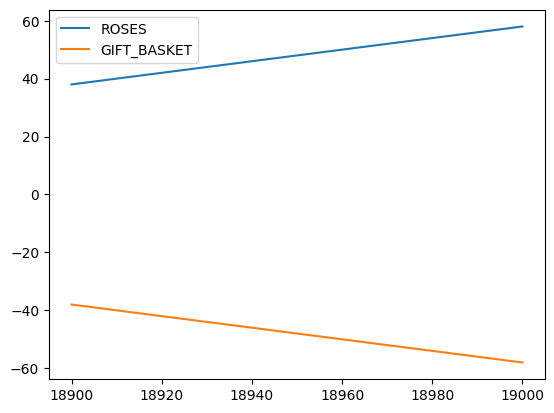

In [25]:
#plot positions of each symbol
import matplotlib.pyplot as plt
# plt.plot(trades_choc['timestamp'], trades_choc['position'], label='CHOCOLATE')
plt.plot(trades_roses['timestamp'], trades_roses['position'], label='ROSES')
# plt.plot(trades_straw['timestamp'], trades_straw['position'], label='STRAWBERRIES')
plt.plot(trades_basket['timestamp'], trades_basket['position'], label='GIFT_BASKET')
plt.legend()
plt.show()


In [26]:
print(trades_basket.head(20))
print(trades_roses.head(20))

   timestamp buyer      seller       symbol  quantity    price  position
0      18900        SUBMISSION  GIFT_BASKET       -38  70625.5       -38
1      19000        SUBMISSION  GIFT_BASKET       -20  70635.0       -58
   timestamp       buyer seller symbol  quantity    price  position
0      18900  SUBMISSION         ROSES        38  14411.5        38
1      19000  SUBMISSION         ROSES        20  14410.0        58
